In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fluid conputation

## Goal 

Here the goal is to compute a fluid in the style og videos of coding adventures. 
However, we will do this on a Jupyter notebook with only numpy and matplotlib. 

The result we will not be the same though. But that will be good, as an exercice, to show the way of resoning when you don't have the same facilities (unity against Matplotlib on a Jupyter Notebook)

## Begining 

He begin his video with "first, let's draw a circle". So let's draw a circle

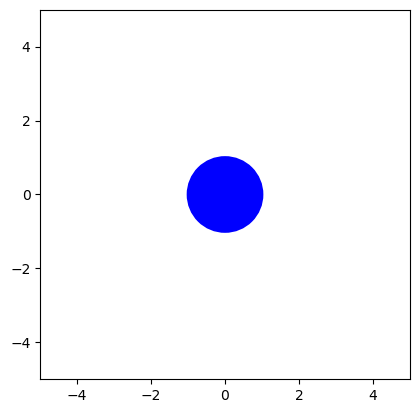

In [2]:
import matplotlib.pyplot as plt

def Circle(ax, radius, centre, color='blue'):
    """Add a circle to the given axis"""
    circle = plt.Circle(centre, radius, color=color, fill=True, linewidth=2)
    ax.add_patch(circle)

def Graph(circles):
    """
    Create the figure, add a list of circles, and show.
    circles: list of tuples (radius, centre, color, fill)
    """
    fig, ax = plt.subplots()

    # add all circles
    for c in circles:
        # unpack with defaults
        radius, centre = c[0], c[1]
        color = c[2] if len(c) > 2 else 'blue'
        Circle(ax, radius, centre, color=color)

    # adjust axes
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    plt.show()

# Example usage
Graph([
    (1, (0, 0), 'blue'),
])


This circle represents a tiny bit of fluid. And will move and respond to forces. Like gravity

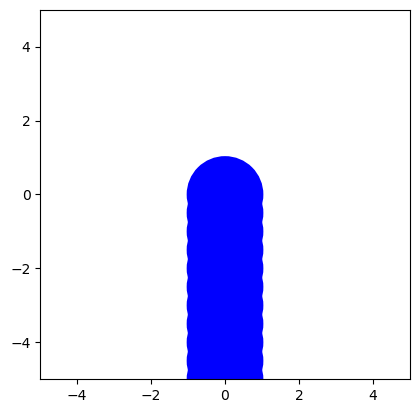

In [3]:
dt = 0.1
N = 15
gravity = 5

circles = []

for i in range (N) : 
    radius = 1
    centre = (0, 0 - i*dt*gravity)
    circles.append((radius, centre)) 
    
Graph(circles)


Ok, that is good. Let's animate that

<IPython.core.display.Javascript object>


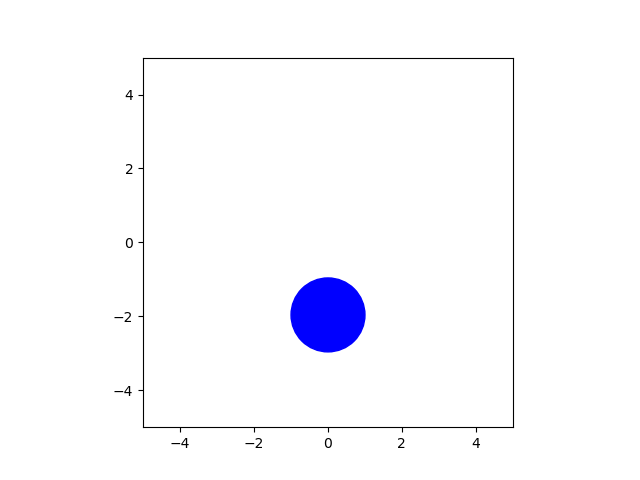

In [4]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation

def Graph(circles, interval=100):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    # Create a single Circle patch
    radius, centre = circles[0][0], circles[0][1]
    color = circles[0][2] if len(circles[0]) > 2 else 'blue'
    ball = plt.Circle(centre, radius, color=color, fill=True)
    ax.add_patch(ball)

    def update(frame):
        radius, centre = circles[frame][0], circles[frame][1]
        color = circles[frame][2] if len(circles[frame]) > 2 else 'blue'
        # move and update color/radius
        ball.center = centre
        ball.set_radius(radius)
        ball.set_facecolor(color)
        return ball,

    ani = FuncAnimation(fig, update, frames=len(circles), interval=interval, blit=True, repeat=True)
    return ani


# Example usage
dt = 0.1
N = 15
gravity = 9.81

circles = []
for i in range(N):
    radius = 1
    centre = (0, 0 - i*dt*gravity)
    circles.append((radius, centre))

ani = Graph(circles)  # store in a variable
plt.show()


(Note that we unfortunately do not see the animation in Git Hub, we will find something else after to correct that) 

good begining. Now we can make the ball bouncing. For that, we will set the velocity of the ball, not the position. And, for collision, a dumping factor : 

<IPython.core.display.Javascript object>


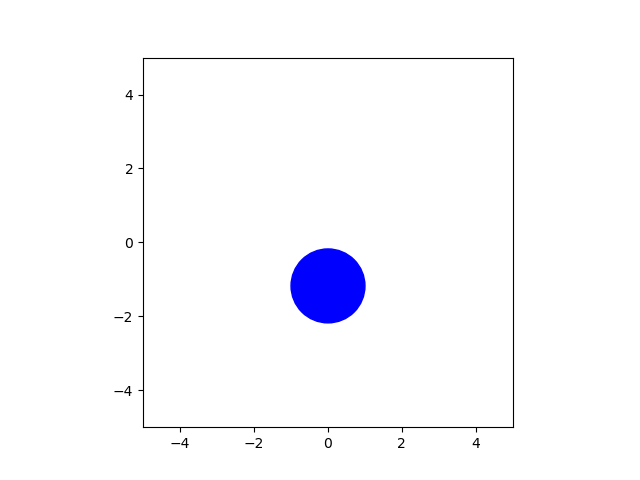

In [5]:
dt = 0.1
N = 300
g = 9.81
velocity = 0
dumpingfactor = 0.8

circles = []

#first circle 
radius = 1
centre = (0, 0)
circles.append((radius, centre))
    
    
for i in range(N):
    velocity += g*dt
    
    if (centre[1] - radius <= -5) and (velocity > 0) :
        velocity = -velocity*dumpingfactor
        
    centre = (0,centre[1] - velocity*dt)
    
    circles.append((radius, centre))

ani = Graph(circles)  
plt.show()

Ok, that is good. Let's create other circles. Begining by a second one 

First, we will change our graph function in order to have servial circles. And also make the simulation more realistic.

<IPython.core.display.Javascript object>


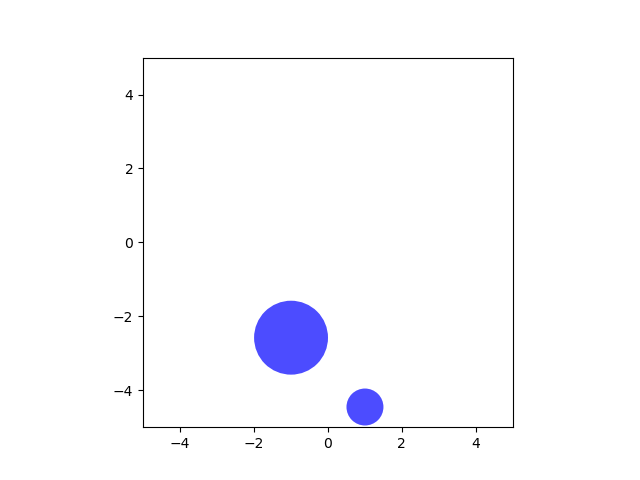

In [179]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches

# Function to create animation
def Graph(circles, interval=0.5):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    # Create one Circle patch per particle
    balls = []
    for particle in circles:
        radius, centre = particle[0][:2]
        color = particle[0][2] if len(particle[0]) > 2 else 'blue'
        ball = patches.Circle(centre, radius, facecolor=color, alpha=0.7)
        ax.add_patch(ball)
        balls.append(ball)

    # Update function
    def update(frame):
        for i, particle in enumerate(circles):
            radius, centre = particle[frame][:2]
            color = particle[frame][2] if len(particle[frame]) > 2 else 'blue'
            balls[i].center = centre
            balls[i].set_radius(radius)
            balls[i].set_facecolor(color)
        return balls

    ani = FuncAnimation(fig, update, frames=len(circles[0]), interval=interval, blit=True, repeat=True)
    return ani


# ---- Example motion for two circles ----
N = 1000
dt = 0.01
g = 9.81
dumpingfactor = 0.9

circle1 = []
circle2 = []

radius1 = 1
centre1 = (-1, 0)
circle1.append((radius1, centre1))

radius2 = 0.5
centre2 = (1, 0)
circle2.append((radius2, centre2))

velocity1 = 0
velocity2 = 0

for i in range(N):
    velocity1 += g*dt
    if (centre1[1] - radius1 <= -5) and (velocity1 > 0):
        velocity1 = -velocity1 * dumpingfactor
    centre1 = (centre1[0], centre1[1] - velocity1*dt)
    circle1.append((radius1, centre1))

    velocity2 += g*dt
    if (centre2[1] - radius2 <= -5) and (velocity2 > 0):
        velocity2 = -velocity2 * dumpingfactor
    centre2 = (centre2[0], centre2[1] - velocity2*dt)
    circle2.append((radius2, centre2))

# Animate
ani = Graph([circle1, circle2])
plt.show()


that is loking nice. Now we can create more particles with that new Graph function

<IPython.core.display.Javascript object>


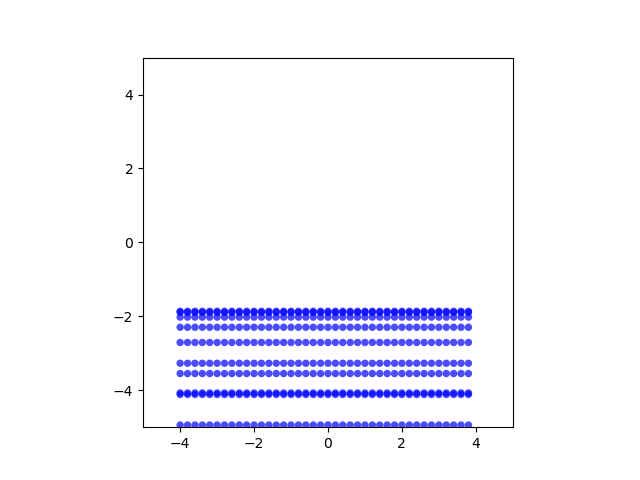

In [180]:
def Particle(Xorigin,Yorigin,N) :
    circle = []
    
    velocity = 0
    centre = (Xorigin,Yorigin)
    radius = 0.1
    dt = 0.01
    
    for i in range(N) :
        #simulate gravity
        g = 9.81
        velocity += g*dt
        
        dubmpfactor = 0.9
        if (centre[1] - radius <= -5) and (velocity > 0):
            velocity = -velocity * dumpingfactor    
        centre = (centre[0], centre[1] - velocity*dt)
        circle.append((radius, centre))
        
    return circle
    
circles = []

for j in range (10) :
    Yorigin = j*0.2
    for i in range (40) : 
        Xorigin = i*0.2 - 4
        circles.append(Particle(Xorigin, Yorigin,1000))
    

ani = Graph(circles)
plt.show()

Ok, that is almost good. Let's add some physics inside the fluid. The first thing is to calculate the density function inside the fluid. For that we have to compute all the particles together (and let's create a dataframe to compute that better).

A way to do that is to create a "smoothing radius" for the particle (with 1 at the distance 0 and 0 at the end of the smoothing radius). And a way to get that nice and smooth is squaring the distance : 

$$
Eff = Max(0, S_{rad} - d)^2
$$

the thing is also stabilize the volume of the smoothing function. Because we wanna make sure that the density remains the same if we only plays with the smoothing radius. Let's compute that up. This radius can have a tiny byt of volume, both sides the effectiveness function and (s-x), the other side x 

$$
V = \int_0^{2\pi} \int_0^s (s - x)^2 x dxd\theta 
$$

$$
V = 2\pi \int_0^s (s - x)^2 x dx = 2\pi \int_0^s s^2x - 2sx^2 + x^3 dx 
$$

$$
V = 2\pi \left[ \frac{s^4}{2} - \frac{2s^4}{3} + \frac{s^4}{4} dx \right] = \pi\frac{s^4}{6}
$$

Now we have that, we can use the fact that liquids are imcompressible. So we expect to "correct" the densities. Just change the animation function in order to have a proprer seen

In [177]:
# Function to create animation
def Graph(circles, interval=0.5):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-3.5, 3.5)
    ax.set_ylim(-3.5, 3.5)

    # Create one Circle patch per particle
    balls = []
    for particle in circles:
        radius, centre = particle[0][:2]
        color = particle[0][2] if len(particle[0]) > 2 else 'blue'
        ball = patches.Circle(centre, radius, facecolor=color, alpha=0.7)
        ax.add_patch(ball)
        balls.append(ball)

    # Update function
    def update(frame):
        for i, particle in enumerate(circles):
            radius, centre = particle[frame][:2]
            color = particle[frame][2] if len(particle[frame]) > 2 else 'blue'
            balls[i].center = centre
            balls[i].set_radius(radius)
            balls[i].set_facecolor(color)
        return balls

    ani = FuncAnimation(fig, update, frames=len(circles[0]), interval=interval, blit=True, repeat=True)
    return ani

In [172]:
import pandas as pd
dt = 0.01
dx = 0.1
g = 5
m = 0.001

def Density (df, X, Y) : 
    
    Sradius = 0.3
    Svolume = np.pi*Sradius**4/6
    
    rho = 0
    for i in range(len(df)) :
        cX = df["centerX"][i]
        cY = df["centerY"][i]
        
        d = np.sqrt((cX - X)**2 + (cY - Y)**2)

        influence = max(0, Sradius - d)
        influence = influence**2/Svolume

        rho += m*influence
    
    return rho

def Forces(df) :
    
    #simulation of the instant N+1 :
    dfpp = df.copy()
    
    for i in range(len(df)) :

        cX = dfpp["centerX"][i]
        cY = dfpp["centerY"][i]
        vX = dfpp["velocityX"][i]
        vY = dfpp["velocityY"][i]
        radius = dfpp["radius"][i]
        
        #simulate gravity
        vY -= g*dt
        
        #collisions to walls
        dumpingfactor = 0.2
    
        #Calcul du gradient de la densité :
        rhoDX = (Density(dfpp, cX + dx, cY) - Density(dfpp, cX - dx, cY))/(2*dx)
        rhoDY = (Density(dfpp, cX, cY + dx) - Density(dfpp, cX, cY - dx))/(2*dx)
        
        vX -= rhoDX
        vY -= rhoDY
        
        
        #bottom
        if (cY - radius <= -3.5) and (vY < 0):
            vY = -vY * dumpingfactor + 1
        #up
        if (cY + radius >= 3.5) and (vY > 0):
            vY = -vY * dumpingfactor - 1
        #left
        if (cX - radius <= -3.5) and (vX < 0):
            vX = -vX * dumpingfactor + 1
            
        #right
        if (cX + radius >= 3.5) and (vX > 0):
            vX = -vX * dumpingfactor - 1
            
        cX += vX * dt
        cY += vY * dt
            
        
        dfpp.loc[i, "centerX"] = cX
        dfpp.loc[i, "centerY"] = cY
        dfpp.loc[i, "velocityX"] = vX
        dfpp.loc[i, "velocityY"] = vY
        dfpp.loc[i, "radius"] = radius
        
    return dfpp
    
def Simulation(dfinit, N):
    circles = []
    df = dfinit.copy()
    
    for j in range(len(df)) :
            cX = df["centerX"][j]
            cY = df["centerY"][j]
            radius = df["radius"][j]
            circles.append([(radius,(cX,cY))])
    
    for i in range (N) :
        
        for j in range(len(df)) :
            cX = df["centerX"][j]
            cY = df["centerY"][j]
            radius = df["radius"][j]

            circles[j].append((radius, (cX,cY)))
            
        df = Forces(df)
                            
    return circles



circles = []
radius = 0.1
velocityX = 0
velocityY = 0
    
#Initialization
for j in range (30) :
    Yorigin = j*0.1
    for i in range (5) : 
        Xorigin = i*0.3 - 0.6
        centerX = Xorigin
        centerY = Yorigin
        circles.append((radius, centerX, centerY, velocityX, velocityY))

df = pd.DataFrame(circles, columns=["radius", "centerX", "centerY", "velocityX", "velocityY"])
FirstSimulation = Simulation(df,200)

print("ok")

ok


<IPython.core.display.Javascript object>


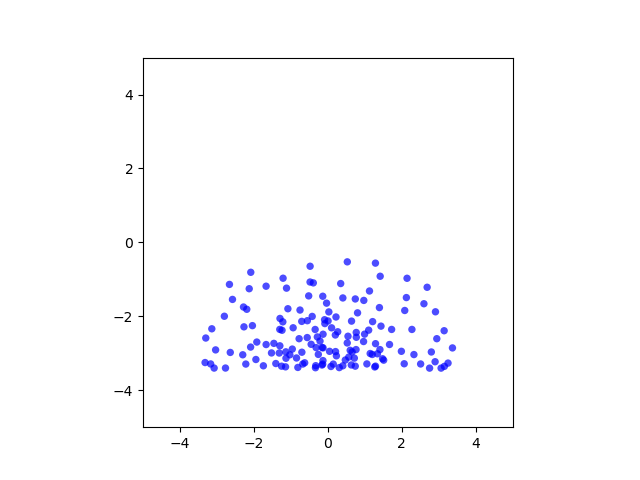

In [181]:
ani = Graph(FirstSimulation)
plt.show()


Quite good. However, the running time is really poor. But it's not the purpose of this exercise. Now we can also simulate the touch of two balls